In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm, cauchy

In [3]:
from astropy.io import fits

In [4]:
SN2007K = fits.open('SN_Images/SN2007K/SN2007K.ms.fits')

In [5]:
w1 = SN2007K[0].header['CRVAL1']
dw = SN2007K[0].header['CD1_1']
w1 += dw*200
data = SN2007K[0].data[200:-200]

In [6]:
halpha = 6703.6
wspace = np.linspace(w1 - halpha, w1 + dw*len(data) - halpha,len(data))

In [7]:
vspace = wspace*3e5/halpha

Text(0.5, 1.0, 'SN2007K')

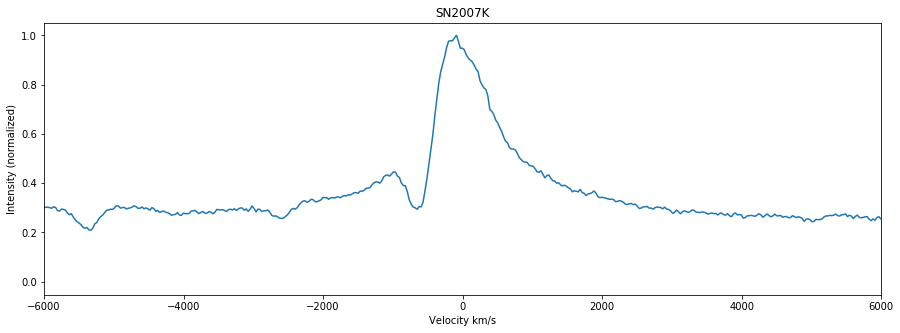

In [8]:
plt.figure(figsize=(15,5))
plt.plot(vspace,data/max(data))
plt.xlim(-6000,+6000)
# plt.ylim(0,1.2e-15)
plt.xlabel('Velocity km/s')
plt.ylabel('Intensity (normalized)')
plt.title('SN2007K')

In [9]:
def plotSpectra(SN,halpha,trim=500,pltBound=6000,saveFig = False):
    fit = fits.open('SN_Images/%s/%s.ms.fits'%(SN,SN))
    
    w1 = fit[0].header['CRVAL1']
    dw = fit[0].header['CD1_1']
    
    data = fit[0].data[trim:-trim]
    w1 += dw*trim
    
    wspace = np.linspace(w1 - halpha, w1 + dw*len(data) - halpha, len(data))
    vspace = wspace*3e5/halpha
    
    plt.figure(figsize=(15,5))
    plt.plot(vspace,data/max(data))
    plt.xlim(-pltBound,pltBound)
    plt.xlabel('Velocity (km/s)')
    plt.ylabel('Intensity (Normalized)')
    plt.title(SN)
    plt.tight_layout()
    
    if saveFig:
        plt.savefig('SN_Images/%s/%s_Halpha.png'%(SN,SN))
    
    plt.show()
    
    return wspace, vspace, data

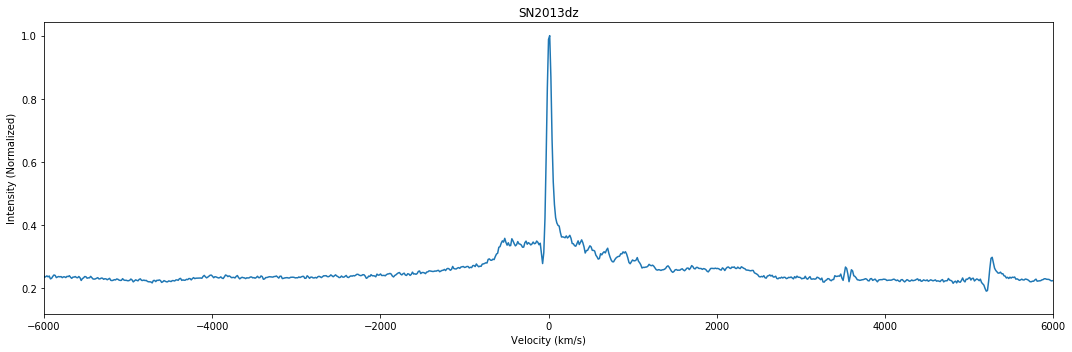

In [10]:
sn13dz = plotSpectra('SN2013dz', 6881.42, saveFig = True)

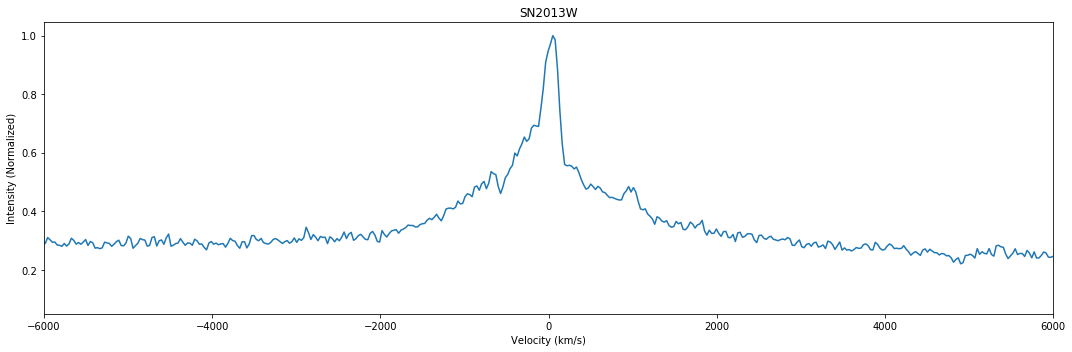

In [11]:
sn13W = plotSpectra('SN2013W', 6761.98, saveFig = True)

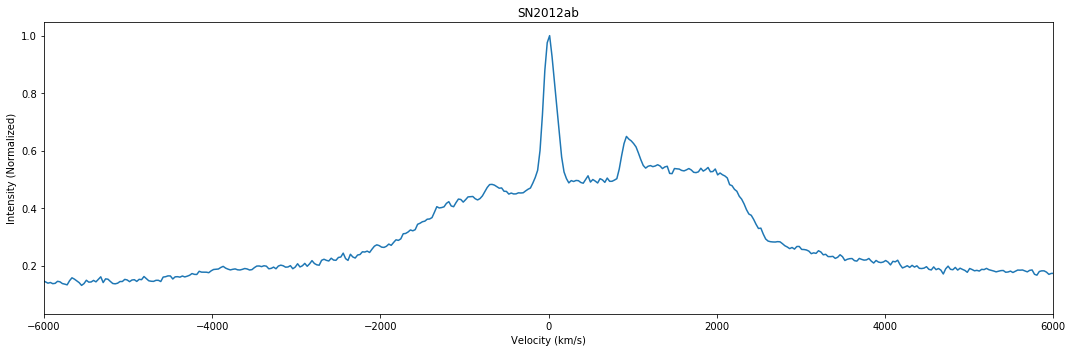

In [12]:
sn12ab = plotSpectra('SN2012ab', 6679.83, trim = 1600, saveFig = True)

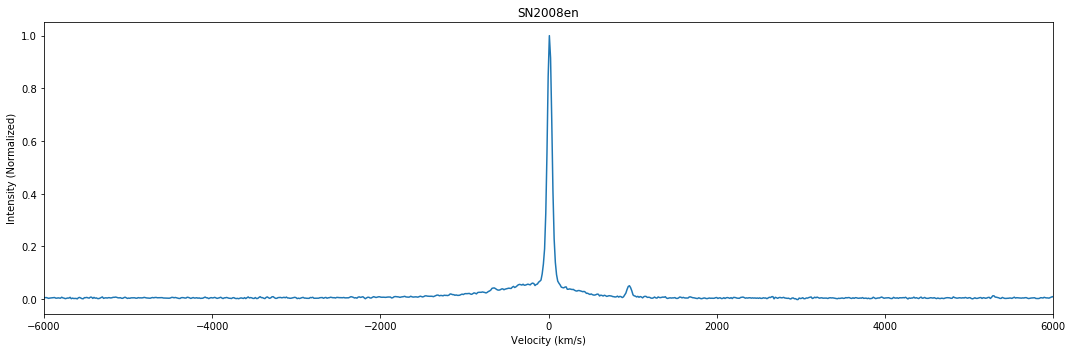

In [13]:
sn08en = plotSpectra('SN2008en', 6804.05, trim = 1600, saveFig = True)

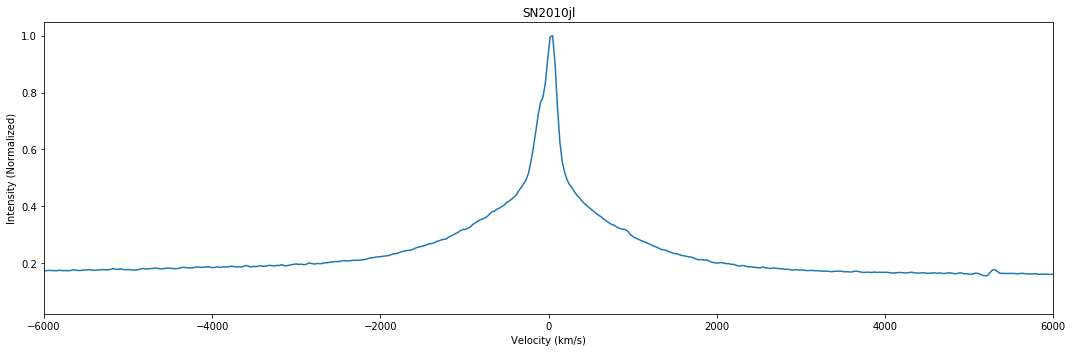

In [14]:
sn10jl = plotSpectra('SN2010jl', 6632.79, saveFig = True)

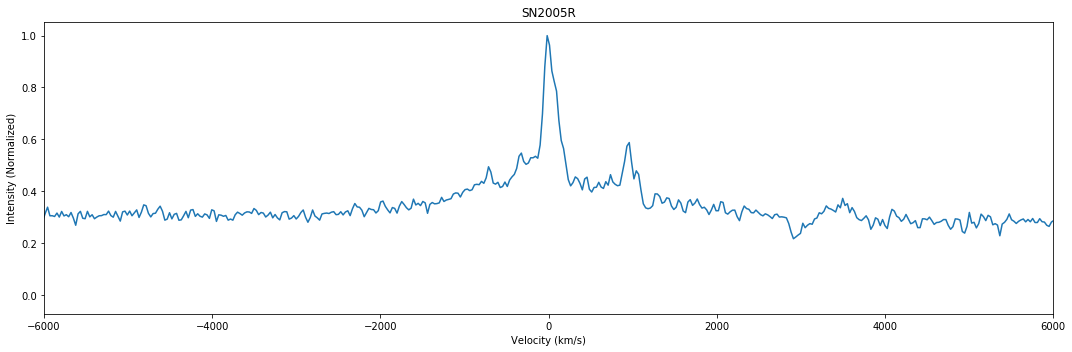

In [15]:
sn05R = plotSpectra('SN2005R', 6801.11, saveFig = True)

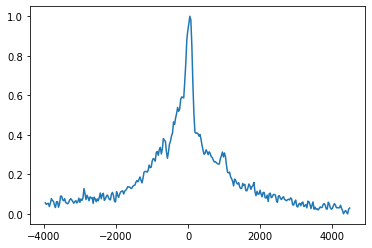

In [16]:
v13W = sn13W[1][3100:3400]
test13W = sn13W[2][3100:3400]
test13W = (test13W - min(test13W))/(max(test13W) - min(test13W))
plt.plot(v13W,test13W)

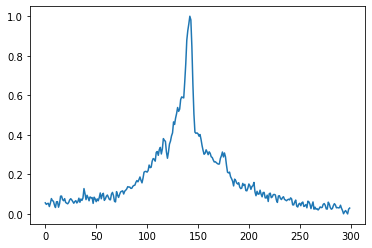

In [17]:
plt.plot(test13W)

In [18]:
wspace = np.linspace(0,299,300)

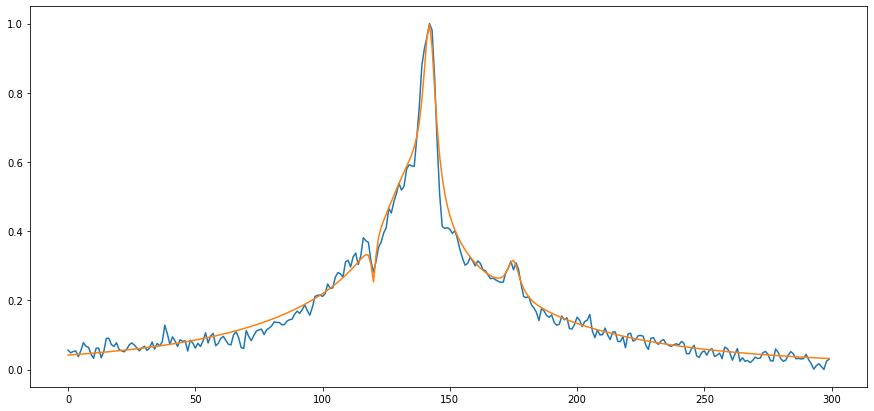

In [19]:
test1 = 8*(0.6*cauchy.pdf(wspace,loc=142,scale=3) + 1.8*cauchy.pdf(wspace,loc=135,scale=15) + 5.6*cauchy.pdf(wspace,loc=138,scale=60) + 0.12*cauchy.pdf(wspace,loc=175,scale=3) - 0.05*cauchy.pdf(wspace,loc=120,scale=1))
plt.figure(figsize=(15,7))
plt.plot(test13W)
plt.plot(test1)

In [20]:
v13W[3]-v13W[1]

56.407174176898934

In [21]:
from scipy.optimize import minimize

In [22]:
def loss2(P,x,y):
    loc1,scale1,weight1,loc2,scale2,weight2 = P
    yhat = weight1*cauchy.pdf(x,loc1,scale1) + weight2*cauchy.pdf(x,loc2,scale2)
    return ((y - yhat)**2).sum()

In [23]:
P_guess2 = [150,5,10,150,5,10]

In [24]:
res2 = minimize(loss2,P_guess2,args=(wspace,test13W),method='Nelder-Mead')

In [25]:
P_fit2 = res2['x']

In [26]:
P_fit2

array([130.80988241,  21.52940318,  98.27409402, 126.06568193,
        14.74898415, -44.94005309])

In [27]:
fitData2 = P_fit2[2]*cauchy.pdf(wspace,loc=P_fit2[0],scale=P_fit2[1]) + P_fit2[5]*cauchy.pdf(wspace,loc=P_fit2[3],scale=P_fit2[4])

In [28]:
def loss3(P,x,y):
    loc1,scale1,weight1,loc2,scale2,weight2,loc3,scale3,weight3 = P
    yhat = weight1*cauchy.pdf(x,loc1,scale1) + weight2*cauchy.pdf(x,loc2,scale2) + weight3*cauchy.pdf(x,loc3,scale3)
    return ((y - yhat)**2).sum()

In [29]:
P_guess3 = [150,5,10,150,5,10,150,5,10]

In [30]:
res3 = minimize(loss3,P_guess3,args=(wspace,test13W),method='Nelder-Mead')

In [31]:
P_fit3 = res3['x']

In [32]:
P_fit3

array([  153.8007095 ,    12.324336  ,   -31.59505946,   147.33852601,
          22.05315772,    85.23155208, -1197.86079064,    51.67252792,
         -31.16053912])

In [33]:
fitData3 = P_fit3[2]*cauchy.pdf(wspace,loc=P_fit3[0],scale=P_fit3[1]) + P_fit3[5]*cauchy.pdf(wspace,loc=P_fit3[3],scale=P_fit3[4]) + P_fit3[8]*cauchy.pdf(wspace,loc=P_fit3[6],scale=P_fit3[7])

In [34]:
def loss4(P,x,y):
    loc1,scale1,weight1,loc2,scale2,weight2,loc3,scale3,weight3,loc4,scale4,weight4 = P
    yhat = weight1*cauchy.pdf(x,loc1,scale1) + weight2*cauchy.pdf(x,loc2,scale2) + weight3*cauchy.pdf(x,loc3,scale3) + weight4*cauchy.pdf(x,loc4,scale4)
    return ((y - yhat)**2).sum()

In [72]:
P_guess4 = [150,5,10,150,5,10,150,5,10,150,5,10]

In [73]:
res4 = minimize(loss4,P_guess4,args=(wspace,test13W),method='Nelder-Mead')

In [74]:
P_fit4 = res4['x']

In [75]:
P_fit4

array([1.75381405e+02, 2.49558334e+01, 1.13068112e+01, 1.11396674e+02,
       7.45211785e+00, 6.50106952e+00, 1.39732531e+02, 1.08631874e+01,
       2.52349330e+01, 9.84773036e+01, 2.77636096e-02, 2.66522302e+00])

In [39]:
fitData4 = P_fit4[2]*cauchy.pdf(wspace,loc=P_fit4[0],scale=P_fit3[1]) + P_fit4[5]*cauchy.pdf(wspace,loc=P_fit3[3],scale=P_fit3[4]) + P_fit4[8]*cauchy.pdf(wspace,loc=P_fit4[6],scale=P_fit4[7]) + P_fit4[11]*cauchy.pdf(wspace,loc=P_fit4[9],scale=P_fit4[10])

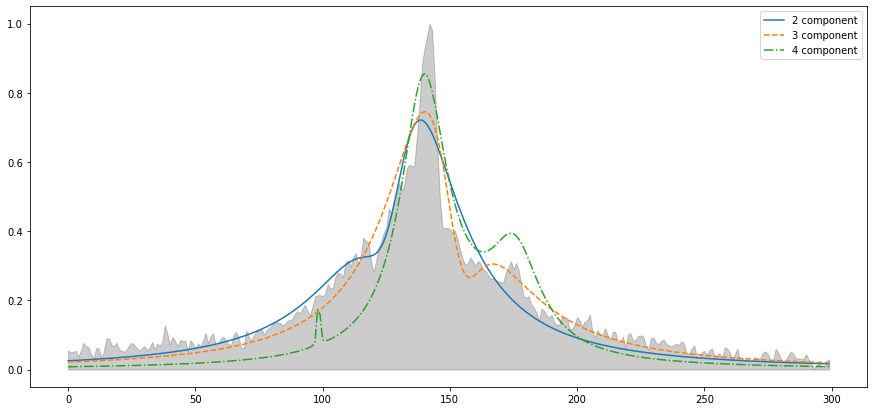

In [40]:
plt.figure(figsize=(15,7))
plt.fill_between(wspace,0,test13W,color='k',alpha=0.2)
plt.plot(fitData2,label='2 component')
plt.plot(fitData3,ls='--',label='3 component')
plt.plot(fitData4,ls='-.',label='4 component')
plt.legend()
plt.show()
# plt.plot(P_fit2[2]*cauchy.pdf(wspace,loc=P_fit2[0],scale=P_fit2[1]),alpha=0.5)
# plt.plot(P_fit2[5]*cauchy.pdf(wspace,loc=P_fit2[3],scale=P_fit2[4]),alpha=0.5)

In [41]:
np.array(P_guess4).reshape(3,3)

ValueError: cannot reshape array of size 12 into shape (3,3)

In [91]:
loss4

<function __main__.loss4(P, x, y)>

In [99]:
[n for n in range(ncomp)]

[0, 1, 2, 3]

In [116]:
np.array([150,5,5]*5)

array([150,   5,   5, 150,   5,   5, 150,   5,   5, 150,   5,   5, 150,
         5,   5])

In [139]:
ncomp=4
pGuess = np.array([150,5,5]*ncomp)
x=wspace
y=test13W

def loss(pGuess,x,y):
    yhat = 0
    for n in range(ncomp):
        yhat += pGuess[n*3+2]*cauchy.pdf(x,pGuess[n*3+0],pGuess[n*3+1])
    return ((y - yhat)**2).sum()

res = minimize(loss,pGuess,args=(wspace,test13W),method='Nelder-Mead',options={'maxiter':1e6})
fit = res['x'].reshape(ncomp,3)
print(fit)
print(res['message'],'\nn_iter:\t',res['nit'])
fitData = 0
for n in range(ncomp):
    fitData += fit[n][2]*cauchy.pdf(x,fit[n][0],fit[n][1])

[[189.6673625    8.43348351  -0.35383308]
 [139.07975495  41.33550255  53.95183995]
 [143.09585064   5.31233753  26.4833277 ]
 [144.72674907   5.63194902 -20.26742599]]
Optimization terminated successfully. 
n_iter:	 4563


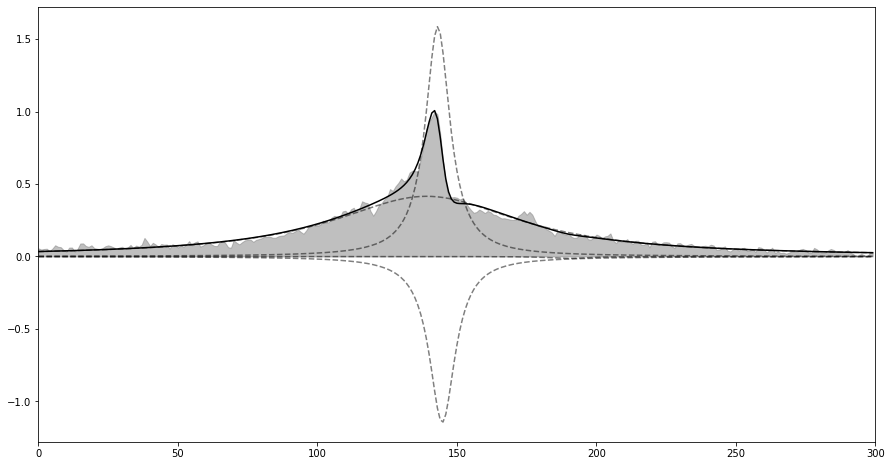

In [142]:
plt.figure(figsize=(15,8))
plt.xlim(0,len(wspace))
for n in range(ncomp):
    plt.plot(fit[n][2]*cauchy.pdf(x,fit[n][0],fit[n][1]),'--k',alpha=0.5)
plt.plot(fitData,'k')
plt.fill_between(wspace,0,test13W,color='gray',alpha=0.5)

In [151]:
def gaussFit(ncomp,pGuess,x,y,lorentz=True):
    '''
    Create a fit using multiple gaussians/lorentzians.
    
    Parameters
    ----------
    ncomp  : number of gaussian/lorentzian components
    pGuess : an array of guesses in the order loc, scale, weight. shape is n_comp x 3
    x      : space in x over where to calculate the fits
    y      : the data being fit
    cauchy : if True, this will use Lorentzian profiles instead of Gaussian profiles
    '''
    try:
        pGuess = np.array(pGuess).reshape(ncomp*3,1)
    except ValueError:
        print("pGuess does not have the correct number of components!")
        return
    
    if lorentz:
        
        def loss(pGuess,x,y):
            yhat = 0
            for n in range(ncomp):
                yhat += pGuess[n*3+2]*cauchy.pdf(x,pGuess[n*3+0],pGuess[n*3+1])
            return ((y - yhat)**2).sum()
        
        res = minimize(loss,pGuess,args=(x,y),method='Nelder-Mead',options={'maxiter':1e6})
        fit = res['x'].reshape(ncomp,3)
        print(fit)
        print(res['message'],'\nn_iter:\t',res['nit'])
        fitData = 0
        for n in range(ncomp):
            fitData += fit[n][2]*cauchy.pdf(x,fit[n][0],fit[n][1])
        
        return {'fit':fit,'data':fitData}
    
    elif not lorentz:
        
        def loss(pGuess,x,y):
            yhat = 0
            for n in range(ncomp):
                yhat += pGuess[n*3+2]*norm.pdf(x,pGuess[n*3+0],pGuess[n*3+1])
            return ((y - yhat)**2).sum()
        
        res = minimize(loss,pGuess,args=(x,y),method='Nelder-Mead',options={'maxiter':1e6})
        fit = res['x'].reshape(ncomp,3)
        print(fit)
        print(res['message'],'\nn_iter:\t',res['nit'])
        fitData = 0
        for n in range(ncomp):
            fitData += fit[n][2]*norm.pdf(x,fit[n][0],fit[n][1])
        
        return {'fit':fit,'data':fitData}

[[1.77589737e+02 2.57698098e+01 1.15139333e+01]
 [1.11177748e+02 8.93235176e+00 6.75219703e+00]
 [1.39836344e+02 1.10065629e+01 2.49163787e+01]
 [9.80000009e+01 1.51476909e-13 1.45115526e+00]]
Optimization terminated successfully. 
n_iter:	 6928


IndexError: index 4 is out of bounds for axis 0 with size 4

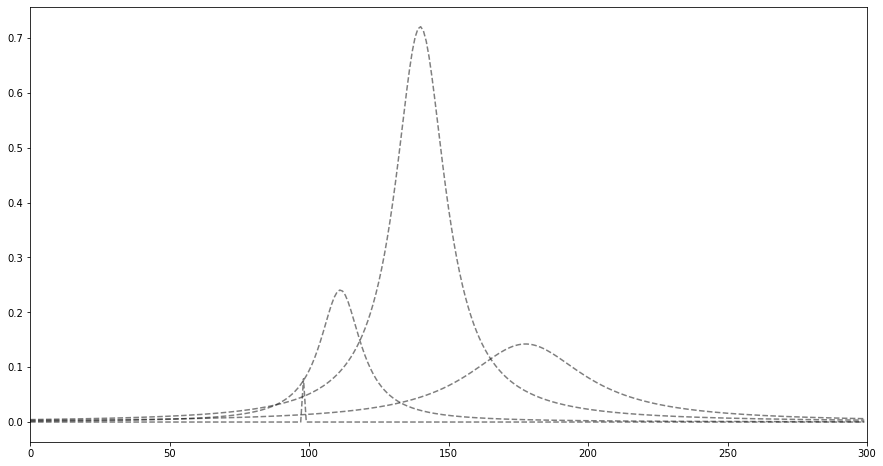

In [171]:
guess13W4 = np.array([[150,5,5]*4])
test13Wfit = gaussFit(4,P_guess4,wspace,test13W)
plt.figure(figsize=(15,8))
plt.xlim(0,len(wspace))
for n in range(ncomp):
    plt.plot(test13Wfit['fit'][n][2]*cauchy.pdf(x,test13Wfit['fit'][n][0],test13Wfit['fit'][n][1]),'--k',alpha=0.5)
plt.plot(test13Wfit['data'],'k')
plt.fill_between(wspace,0,test13W,color='gray',alpha=0.5)

In [763]:
test10jl = sn10jl[2][2950:3150]
test10jl = (test10jl - min(test10jl))/(max(test10jl) - min(test10jl))

200

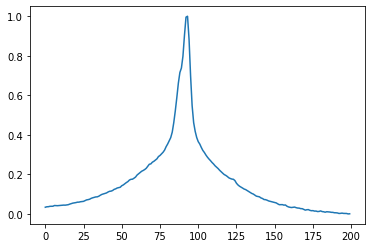

In [764]:
plt.plot(test10jl)
len(test10jl)

In [765]:
xspace = np.linspace(0,len(test10jl),len(test10jl))

In [766]:
P_guess2 = [90,5,10,80,50,6]

In [784]:
P_guess3 = [90,5,10,80,50,6,80,5,10]

In [785]:
res2 = minimize(loss2,P_guess2,args=(xspace,test10jl),method='Nelder-Mead')

In [786]:
P_fit2 = res2['x']

In [787]:
P_fit2

array([92.30330585,  3.76274561,  7.97558465, 87.84755876, 30.81506742,
       31.51046839])

In [788]:
fitData2 = P_fit2[2]*cauchy.pdf(xspace,loc=P_fit2[0],scale=P_fit2[1]) + P_fit2[5]*cauchy.pdf(xspace,loc=P_fit2[3],scale=P_fit2[4])

In [789]:
res3 = minimize(loss3,P_guess3,args=(xspace,test10jl),method='Nelder-Mead')

In [790]:
P_fit3 = res3['x']

In [791]:
P_fit3

array([ 92.28236973,   3.83209264,   8.35045027,  86.14251988,
        31.03031775,  30.30204432, 114.65125642,   5.72795674,
         0.81986537])

In [792]:
fitData3 = P_fit3[2]*cauchy.pdf(xspace,loc=P_fit3[0],scale=P_fit3[1]) + P_fit3[5]*cauchy.pdf(xspace,loc=P_fit3[3],scale=P_fit3[4]) + P_fit3[8]*cauchy.pdf(xspace,loc=P_fit3[6],scale=P_fit3[7])

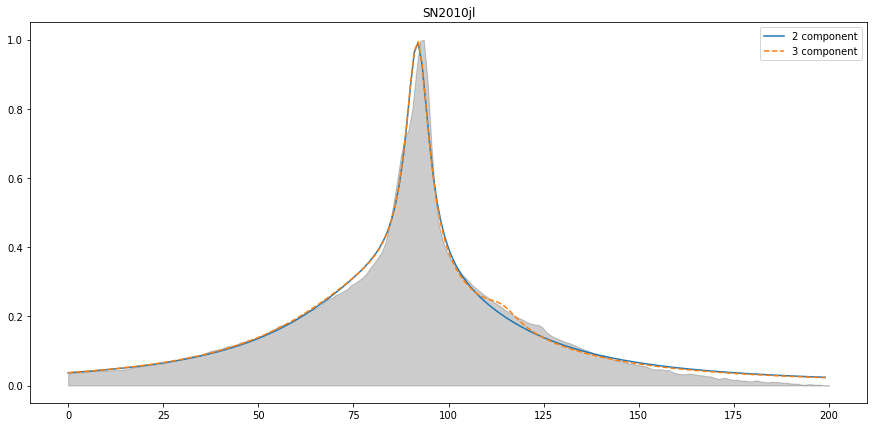

In [797]:
plt.figure(figsize=(15,7))
plt.title('SN2010jl')
plt.fill_between(xspace,0,test10jl,color='k',alpha=0.2)
plt.plot(fitData2,label='2 component')
plt.plot(fitData3,ls='--',label='3 component')
plt.legend()
plt.show()
# plt.plot(P_fit2[2]*cauchy.pdf(xspace,loc=P_fit2[0],scale=P_fit2[1]),ls='--',alpha=0.5)
# plt.plot(P_fit2[5]*cauchy.pdf(xspace,loc=P_fit2[3],scale=P_fit2[4]),ls='--',alpha=0.5)

In [183]:
def plotFit(ncomp,guess,xspace,data,vspace):
    guess = np.array(guess).reshape(1,ncomp*3)
    test13Wfit = gaussFit(ncomp,guess,xspace,data)
    plt.figure(figsize=(15,8))
    plt.xlim(vspace[0],vspace[-1])
    for n in range(ncomp):
        plt.plot(vspace,test13Wfit['fit'][n][2]*cauchy.pdf(x,test13Wfit['fit'][n][0],test13Wfit['fit'][n][1]),'--k',alpha=0.5)
    plt.plot(vspace,test13Wfit['data'],'k')
    plt.fill_between(vspace,0,data,color='gray',alpha=0.5)

[[131.63267649  28.93576776  27.82936311]
 [154.0829755   61.76206615  26.05084353]
 [141.26231617   3.36826914   6.62709333]]
Optimization terminated successfully. 
n_iter:	 2237


Text(0.5, 1.0, 'SN2013W')

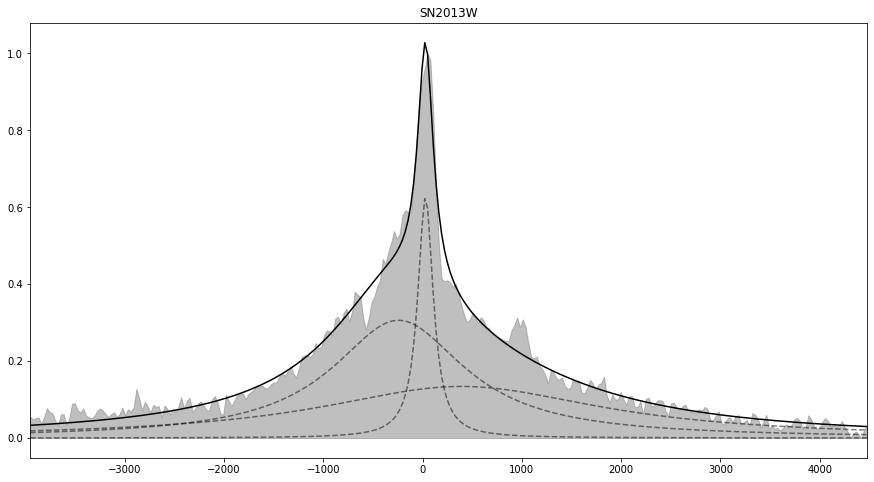

In [184]:
ncomp = 3
guess13W = [150,10,5]*ncomp
plotFit(ncomp,guess13W,wspace,test13W,v13W)
plt.title('SN2013W')